<a href="https://colab.research.google.com/github/vishalikabondre-design/Internship/blob/main/WE_INTERN_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CUSTOMER SEGMENTATION USING CLUSTERING Description: Use K-Means or hierarchical clustering to group customers based on purchasing behavior. Challenges: Scale and normalize features Choose optimal k using the Elbow Method Visualize clusters using 2D/3D plots Tech Stack: Python, Scikit-learn, Pandas, Matplotlib

Dataset Shape: (878, 4)

First 5 Rows of Dataset:
                                       Title  \
0  Never seen the anime and still enjoyed it   
1     Not My Kind of Show. But This I Loved.   
2         I'm Shocked By How Good This Is...   
3             See Netflix?? You CAN do it...   
4                           WE WANT SEASON 2   

                                              Review              Date  Rating  
0  I have to admit that I've never watched any of...  4 September 2023     8.0  
1  I'm a 60yo man & old school like the The Marin...  4 September 2023     9.0  
2  Every live action anime that I've briefly seen...  1 September 2023     9.0  
3  This is bar none one of the best live-action a...  4 September 2023    10.0  
4  Being a one piece fan myself, I was a bit inse...    31 August 2023    10.0  

Numeric Features Used for Clustering:
['Rating']

Samples used for clustering: 870
Numeric features count: 1


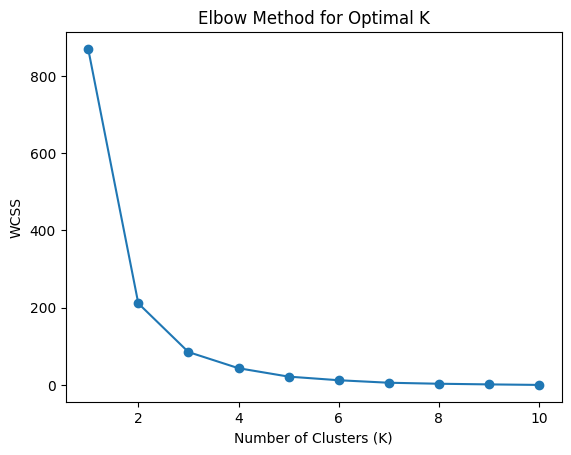


Visualizing Clusters...


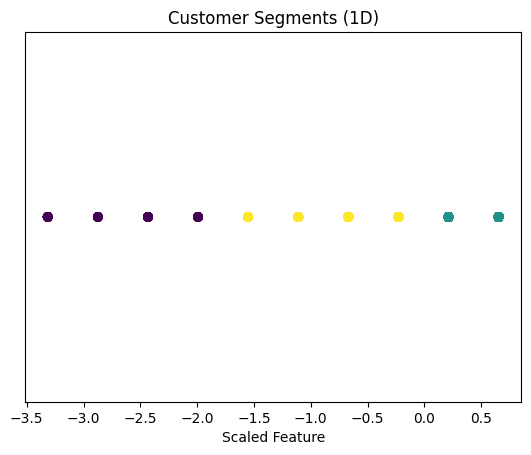


--- Clustering Evaluation Metrics ---
Silhouette Score: 0.7444
Davies-Bouldin Index (DBI): 0.4529
Calinski-Harabasz Index: 3995.6709

Note: No true labels found. ARI/Homogeneity/Completeness use dummy labels.
Adjusted Rand Index (ARI): -0.0011
Homogeneity Score: 0.0016
Completeness Score: 0.0023

Dataset with Cluster Labels (first rows):
                                       Title  \
0  Never seen the anime and still enjoyed it   
1     Not My Kind of Show. But This I Loved.   
2         I'm Shocked By How Good This Is...   
3             See Netflix?? You CAN do it...   
4                           WE WANT SEASON 2   

                                              Review              Date  \
0  I have to admit that I've never watched any of...  4 September 2023   
1  I'm a 60yo man & old school like the The Marin...  4 September 2023   
2  Every live action anime that I've briefly seen...  1 September 2023   
3  This is bar none one of the best live-action a...  4 September 2023   


In [4]:
# Customer Segmentation using K-Means Clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import homogeneity_score, completeness_score

# 1. Load Dataset

file_path = "/content/reviews.csv"
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows of Dataset:")
print(df.head())

# 2. Select Numeric Features

data = df.select_dtypes(include=[np.number])

print("\nNumeric Features Used for Clustering:")
print(list(data.columns))

# Drop rows with missing numeric values
data = data.dropna()

# Save indices used for clustering
used_index = data.index

# Check numeric features exist
if data.shape[1] == 0:
    raise ValueError("No numeric columns found for clustering!")

# 3. Feature Scaling

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

n_samples, n_features = scaled_data.shape
print(f"\nSamples used for clustering: {n_samples}")
print(f"Numeric features count: {n_features}")

# 4. Elbow Method

max_k = min(10, n_samples)
wcss = []

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

# 5. Train K-Means

optimal_k = min(3, n_samples)

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

# 6. Cluster Visualization

print("\nVisualizing Clusters...")

if n_features >= 2:
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)

    plt.figure()
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("Customer Segments (PCA-2D)")
    plt.show()
else:
    plt.figure()
    plt.scatter(scaled_data[:, 0], np.zeros_like(scaled_data[:, 0]), c=cluster_labels)
    plt.xlabel("Scaled Feature")
    plt.title("Customer Segments (1D)")
    plt.yticks([])
    plt.show()

# 7. Evaluation Metrics

sil_score = silhouette_score(scaled_data, cluster_labels)
dbi_score = davies_bouldin_score(scaled_data, cluster_labels)
ch_score = calinski_harabasz_score(scaled_data, cluster_labels)

print("\n--- Clustering Evaluation Metrics ---")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index (DBI): {dbi_score:.4f}")
print(f"Calinski-Harabasz Index: {ch_score:.4f}")

# 8. ARI, Homogeneity, Completeness

if 'true_label' in df.columns:
    true_labels = df.loc[used_index, 'true_label']
else:
    true_labels = np.random.randint(0, optimal_k, size=len(cluster_labels))
    print("\nNote: No true labels found. ARI/Homogeneity/Completeness use dummy labels.")

ari = adjusted_rand_score(true_labels, cluster_labels)
homogeneity = homogeneity_score(true_labels, cluster_labels)
completeness = completeness_score(true_labels, cluster_labels)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")
print(f"Completeness Score: {completeness:.4f}")

# 9. Attach Cluster Labels to Original Dataset Safely

# Create empty Cluster column
df['Cluster'] = np.nan

# Assign labels only to rows used in clustering
df.loc[used_index, 'Cluster'] = cluster_labels

print("\nDataset with Cluster Labels (first rows):")
print(df.head())


The dataset was preprocessed by selecting numerical purchasing features, handling missing values, and applying StandardScaler normalization. The optimal number of clusters was estimated using the Elbow Method. K-Means clustering was applied, and clusters were visualized using PCA-based 2D projection. Clustering performance was evaluated using Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Score.